In [4]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


''

**Test by loading trained model:**

In [2]:
import cv2
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image, detect_video
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

{'chair': [array([5.54300781e+02, 4.10824890e+02, 6.38673340e+02, 4.76674591e+02,
       3.25253278e-01, 5.60000000e+01])], 'person': [array([ 51.23086929,  42.00364304, 573.83483887, 469.99368286,
         0.99938637,   0.        ])]}


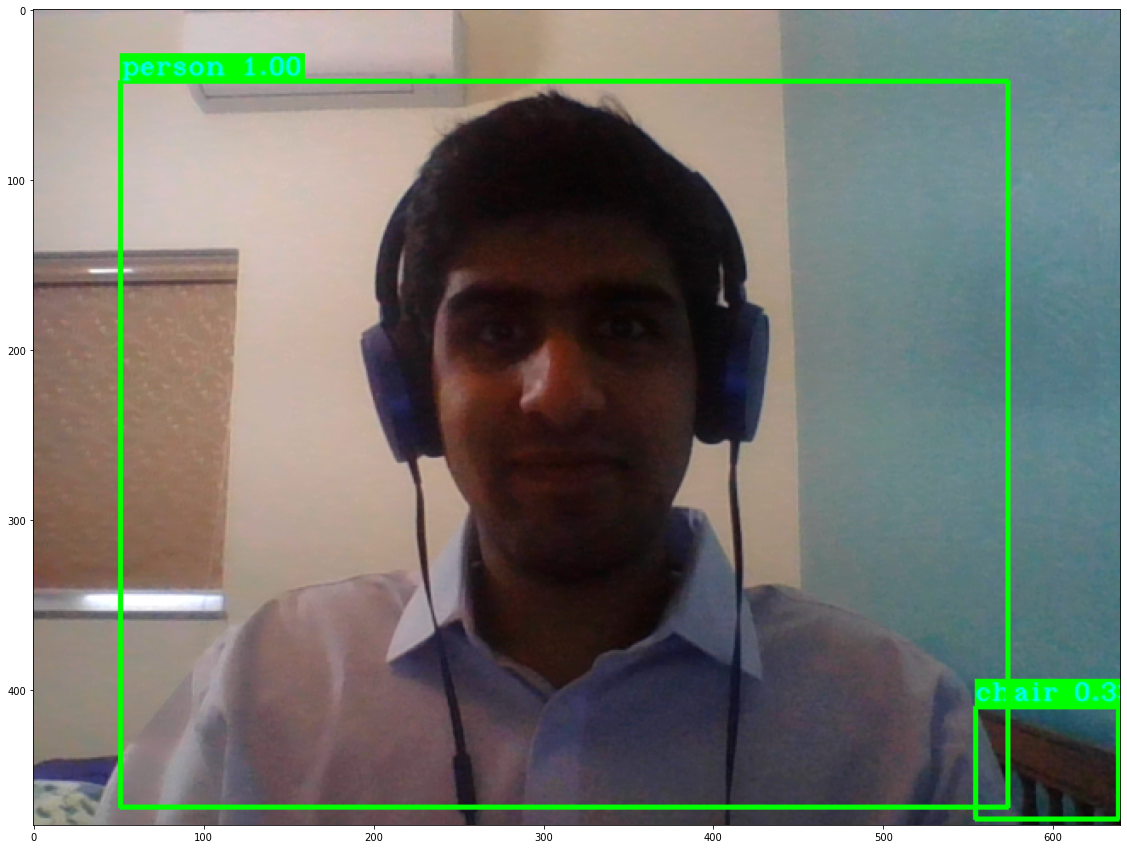

In [5]:
import cv2

cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`

while(True):
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y' 
        cv2.imwrite('test1.png',frame)
        cv2.destroyAllWindows()
        break

cap.release()

image_path   = "./test1.png"

image,cl = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(0,255,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(cl)
plt.figure(figsize=(30,15))
plt.imshow(image)

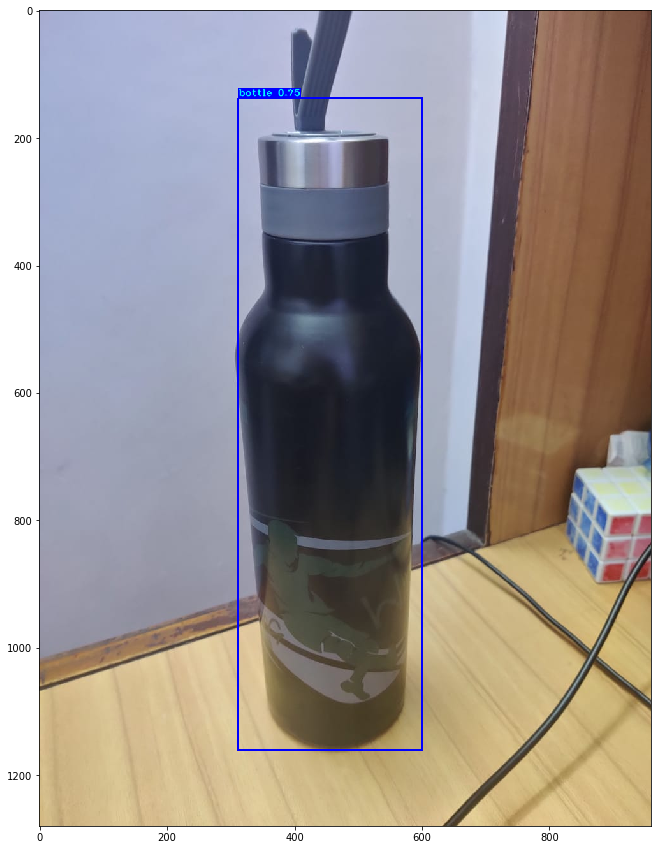

In [23]:
image_path   = "./IMAGES/bottle.jpeg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

['car', 'car', 'car']


(-0.5, 1023.5, 767.5, -0.5)

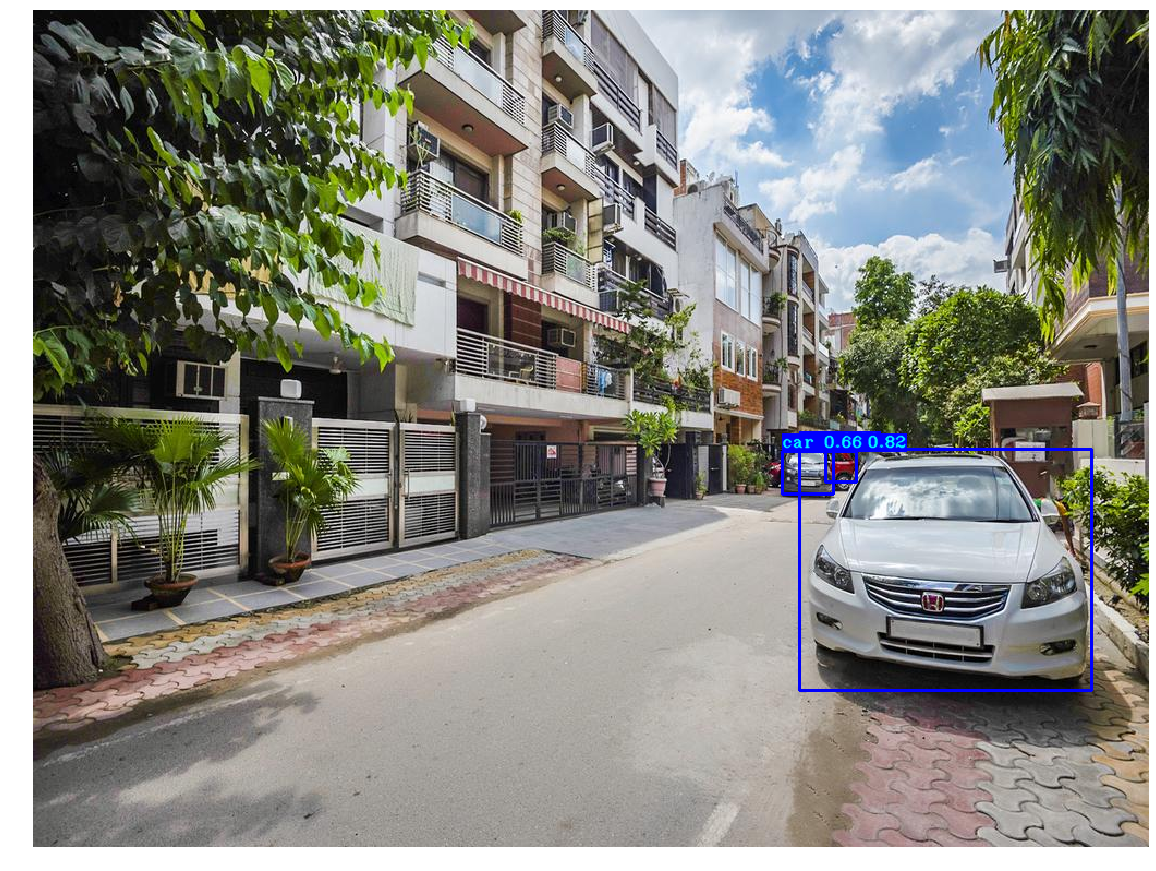

In [9]:
image_path   = "./IMAGES/saket.jpg"

image,cl = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(cl)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis("off")

['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'handbag', 'car', 'bus', 'bus']


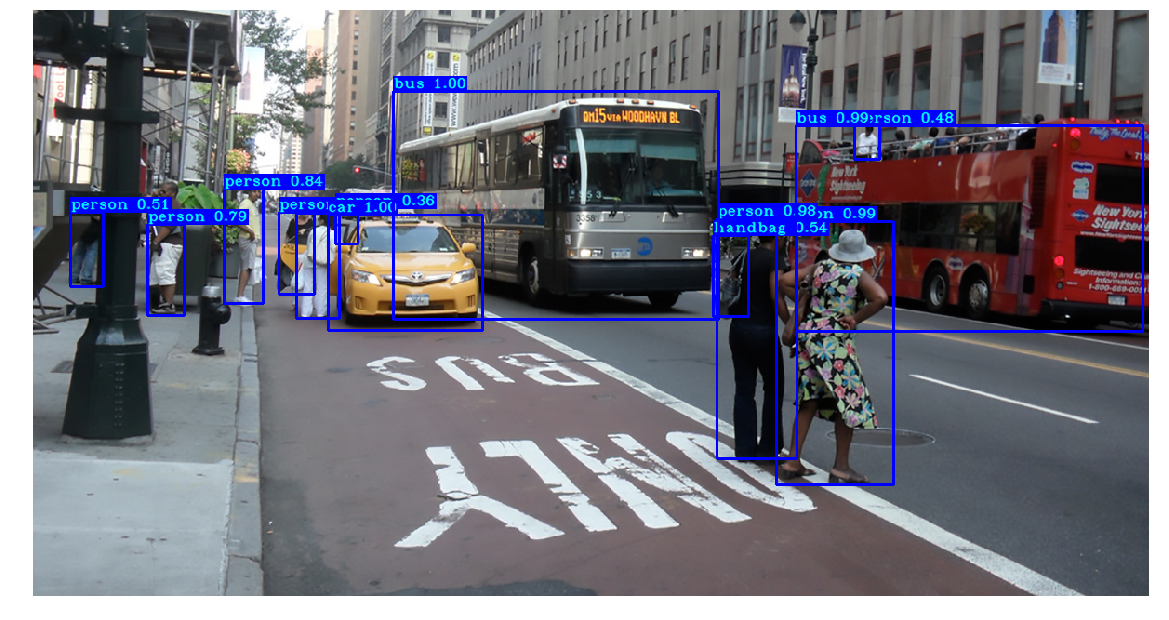

In [14]:
image_path   = "./IMAGES/street.jpg"

image,cl = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(cl)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis("off")

with open('f1.txt','w') as f:
  f.write(' '.join(cl))
f.close()

In [6]:
detect_video(Yolo = yolo, video_path = 0, output_path = '', show=True, rectangle_colors=(0, 255, 0))

Time: 686.12ms, Detection FPS: 1.5, total FPS: 1.4
Time: 711.08ms, Detection FPS: 1.4, total FPS: 1.4
Time: 728.04ms, Detection FPS: 1.4, total FPS: 1.3
Time: 718.07ms, Detection FPS: 1.4, total FPS: 1.4
Time: 711.69ms, Detection FPS: 1.4, total FPS: 1.4
Time: 707.44ms, Detection FPS: 1.4, total FPS: 1.4
Time: 703.54ms, Detection FPS: 1.4, total FPS: 1.4
Time: 700.50ms, Detection FPS: 1.4, total FPS: 1.4
Time: 698.91ms, Detection FPS: 1.4, total FPS: 1.4
Time: 700.42ms, Detection FPS: 1.4, total FPS: 1.4
Time: 708.01ms, Detection FPS: 1.4, total FPS: 1.4
Time: 706.94ms, Detection FPS: 1.4, total FPS: 1.4
Time: 706.11ms, Detection FPS: 1.4, total FPS: 1.4
Time: 704.11ms, Detection FPS: 1.4, total FPS: 1.4
Time: 705.64ms, Detection FPS: 1.4, total FPS: 1.4
Time: 707.04ms, Detection FPS: 1.4, total FPS: 1.4
Time: 705.70ms, Detection FPS: 1.4, total FPS: 1.4
Time: 706.11ms, Detection FPS: 1.4, total FPS: 1.4
Time: 710.57ms, Detection FPS: 1.4, total FPS: 1.4
Time: 709.50ms, Detection FPS: 

In [8]:
labels = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'
}

In [9]:
labels[0]

'airplane'

In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [12]:
data = unpickle("./cifar-10-batches-py/data_batch_1")

{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [23]:
data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [25]:
d_labels = np.array(data[b'labels'])

In [26]:
d_labels

array([6, 9, 9, ..., 1, 1, 5])

In [27]:
d_data = np.array(data[b'data'])

In [28]:
d_data

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)